<h1 style="font-size:60px; 
           color:green;
           text-align:center">
    ENTRENANDO MODELO DE MACHINE LEARNING</h1>

# Table of Contents

* [__Problematica 0__](#chapter1)
* [__Consigna 1__](#section_1)
* [__Librerias 2__](#section_2)
* [__Carga de datos 3__](#section_3)
* [__Creación del dataframe 4__](#section_4)
* [__Data wrangling 5__](#section_5)
    * [__Limpieza 5.1__](#section_5_1)
* [__Feature selection 6__](#section_6)
* [__Machine learning 7__](#section_7)
    * [__Preparación de datos 7.1__](#section_7_1)
    * [__Preparación del modelo 7.2__](#section_7_2)
        * [__Arbol de desiciones 7.2.1__](#section_7_2_1)
        * [__Regresion logistica 7.2.2__](#section_7_2_2)
* [__Observaciones 8__](#section_8)
* [__Futuras lineas 9__](#section_9)




---

# 0. Problematica 

Deberás entregar el décimo avance de tu proyecto final. Continuaremos hablando sobre lo trabajado en la segunda pre entrega del proyecto final. Crearás un notebook donde trabajarás sobre los datos elegidos en la primera y segunda pre entrega del proyecto final. Posteriormente, realizarás las etapas de: i) Encoding, ii) Ingeniería de atributos y iii) Entrenamiento de un modelo de Machine Learning Supervisado (Clasificación o Regresión) o no supervisado dependiendo de la pregunta problema.

# 1. Consigna 

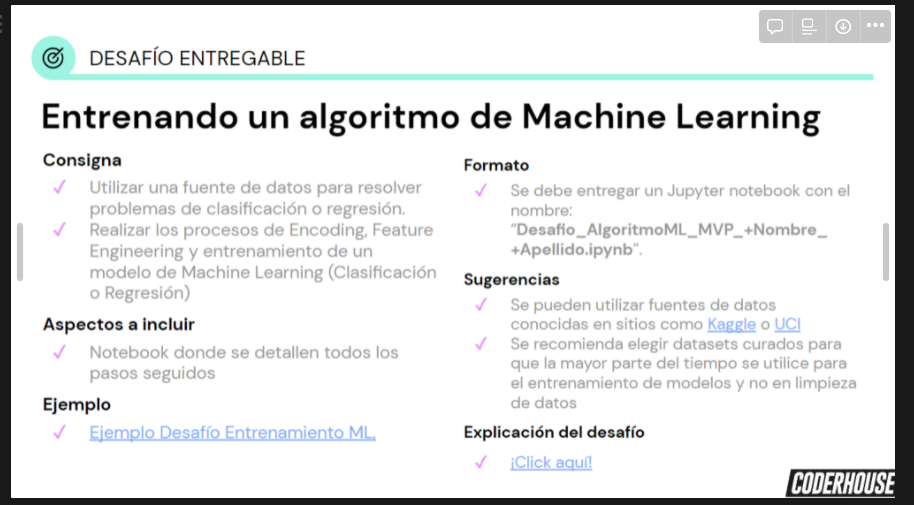

## Librerias 2

In [2]:
# Para trabajar los datos
import json
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os 

# Para eliminar los carteles warnings
import warnings as wn

# Para datos faltantes
import missingno as msno

# Importamos las librerias para realizar los graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importamos las librerias para machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Carga de datos 3

In [3]:
# Cargamos todos los dataframe desde los csv para trabajar de manera mas eficaz la promixa
information = pd.read_csv('data/information.csv')
maestrias_campeones = pd.read_csv('data/maestrias_campeones.csv')
informacion_campeones = pd.read_csv('data/informacion_campeones.csv')
id_partidas = (pd.read_csv('data/id_partidas.csv'))['lista'].tolist()
games_information = pd.read_csv('data/games_information.csv')
challenges_data = pd.read_csv('data/challenges_data.csv')
df_games = pd.read_csv('data/df_games.csv')

C:\Users\176935\AppData\Local\Temp\ipykernel_16016\2799268752.py:8: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games = pd.read_csv('data/df_games.csv')


## Creacion del dataframe 4.1

Creamos un funcion que nos devuelva los datos para un jugador en especifico.

In [4]:
######################################################################################
######################################################################################

# Definimos algunos datos que vamos a definir para trabajar
def historial_del_jugador(nombre_jugador:str)->pd.DataFrame:
    # Extraemos el id del jugador
    id_del_jugador = df_games[df_games['summonerName'] == nombre_jugador]['summonerId'].unique().item()
    
    # Ahora con el id nos quedamos unicamente con las partidas que deseamos
    historial_partidas = df_games[df_games['summonerId'] == id_del_jugador]
    
    return historial_partidas

######################################################################################
######################################################################################

In [5]:
games_from_GCDariusBrando = df_games[df_games['summonerId'] == 'K2twAA5gA-gMXY4YVq0szKaX-er9Hlhz8sitMu4lzN00Qw']
# games_from_GCDariusBrando.to_csv('testeo.csv', index=False)

In [6]:
games_from_GCDariusBrando.head()

,index,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,killAfterHiddenWithAlly,killedChampTookFullTeamDamageSurvived,knockEnemyIntoTeamAndKill,pickKillWithAlly,saveAllyFromDeath,survivedThreeImmobilizesInFight,tookLargeDamageSurvived,takedownsFirstXMinutes,killingSprees_y,playedChampSelectPosition
5,5,8,0,0,12785,14,36,DrMundo,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0,8,0,1,13323,15,122,Darius,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,5,11,0,4,12193,14,36,DrMundo,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,5,11,0,2,15230,16,36,DrMundo,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0,3,0,0,9350,12,36,DrMundo,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Data wrangling 

## Limpieza 5.3

In [7]:
# Contemos la cantidad de valores nulos que poseemos en algunas columnas

columnas = ['riotIdName','riotIdTagline','inhibitorTakedowns','basicPings','allInPings','abilityUses']

for columna in columnas:
    
    # Vemos el listado de columnas y nos diga la cantidad de nulos
    print(f'La cantidad de filas nulas en la columna {columna} es de un total de', df_games[columna].isnull().sum())

La cantidad de filas nulas en la columna riotIdName es de un total de 7220
La cantidad de filas nulas en la columna riotIdTagline es de un total de 7220
La cantidad de filas nulas en la columna inhibitorTakedowns es de un total de 120
La cantidad de filas nulas en la columna basicPings es de un total de 5360
La cantidad de filas nulas en la columna allInPings es de un total de 5690
La cantidad de filas nulas en la columna abilityUses es de un total de 4690


Dada la cantidad de valores nulos que tenemos podemos optar por los siguientes procesos. Como la mayoria de valores nulos exeden el 50% de la muestra, lo mejor que podremos hacer para estos casos es eliminar las columna del analisis. Esto se debe a que el historial de datos que estamos tomando es muy antiguo por lo que los datos que se van almacenando varias. Si deseamos realziar el mismo analisis pero con lapsos de tiempo mas corto, tranquilamente podriammos tomar el historial de una cantidad de partidas X con el cual podriamos trabajar de otra manera estos valores. En el caso de la columna _inhibitorTakedowns_ reemplazaremos los valores nulos con un 0 unicamente al ser un porcentaje chico de la muestra

106
playedChampSelectPosition
Se finalizo el proceso de limpieza


<Axes: >

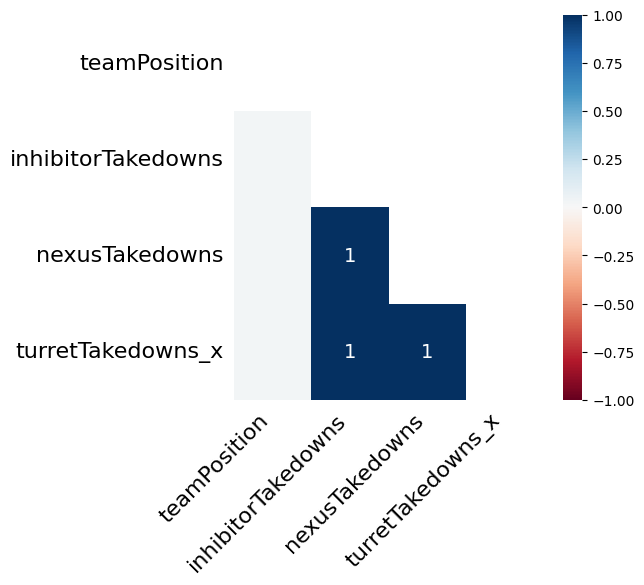

In [8]:
# vemos desde que columna hasta cual hay que eliminar
print(df_games.columns.get_loc('eligibleForProgression'))
print(df_games.columns[250])

# Eliminamos las columnas de mayor cantidad
df_games.drop(df_games.columns[106:251], axis=1, inplace=True)

# Eliminamos las columnas que estan completamente vacias
df_games.drop(columns=['riotIdName', 'riotIdTagline'], inplace=True)

# Rellenamos las columnas que nos quedan con valores igual a 0
df_games.fillna(0)

print('Se finalizo el proceso de limpieza')

# Realizamos un grafico para ver los datos faltantes
msno.heatmap(df_games,
         figsize=(5,5)
         )

Como podemos observar siguen quedando datos nulos en aquellas columnas en donde tengamos un valor igual a 1.

Veamos un poco sobre estas mismas y veamos que tantos valores nos quedan asi vemos como los podemos trabajar.

<Axes: >

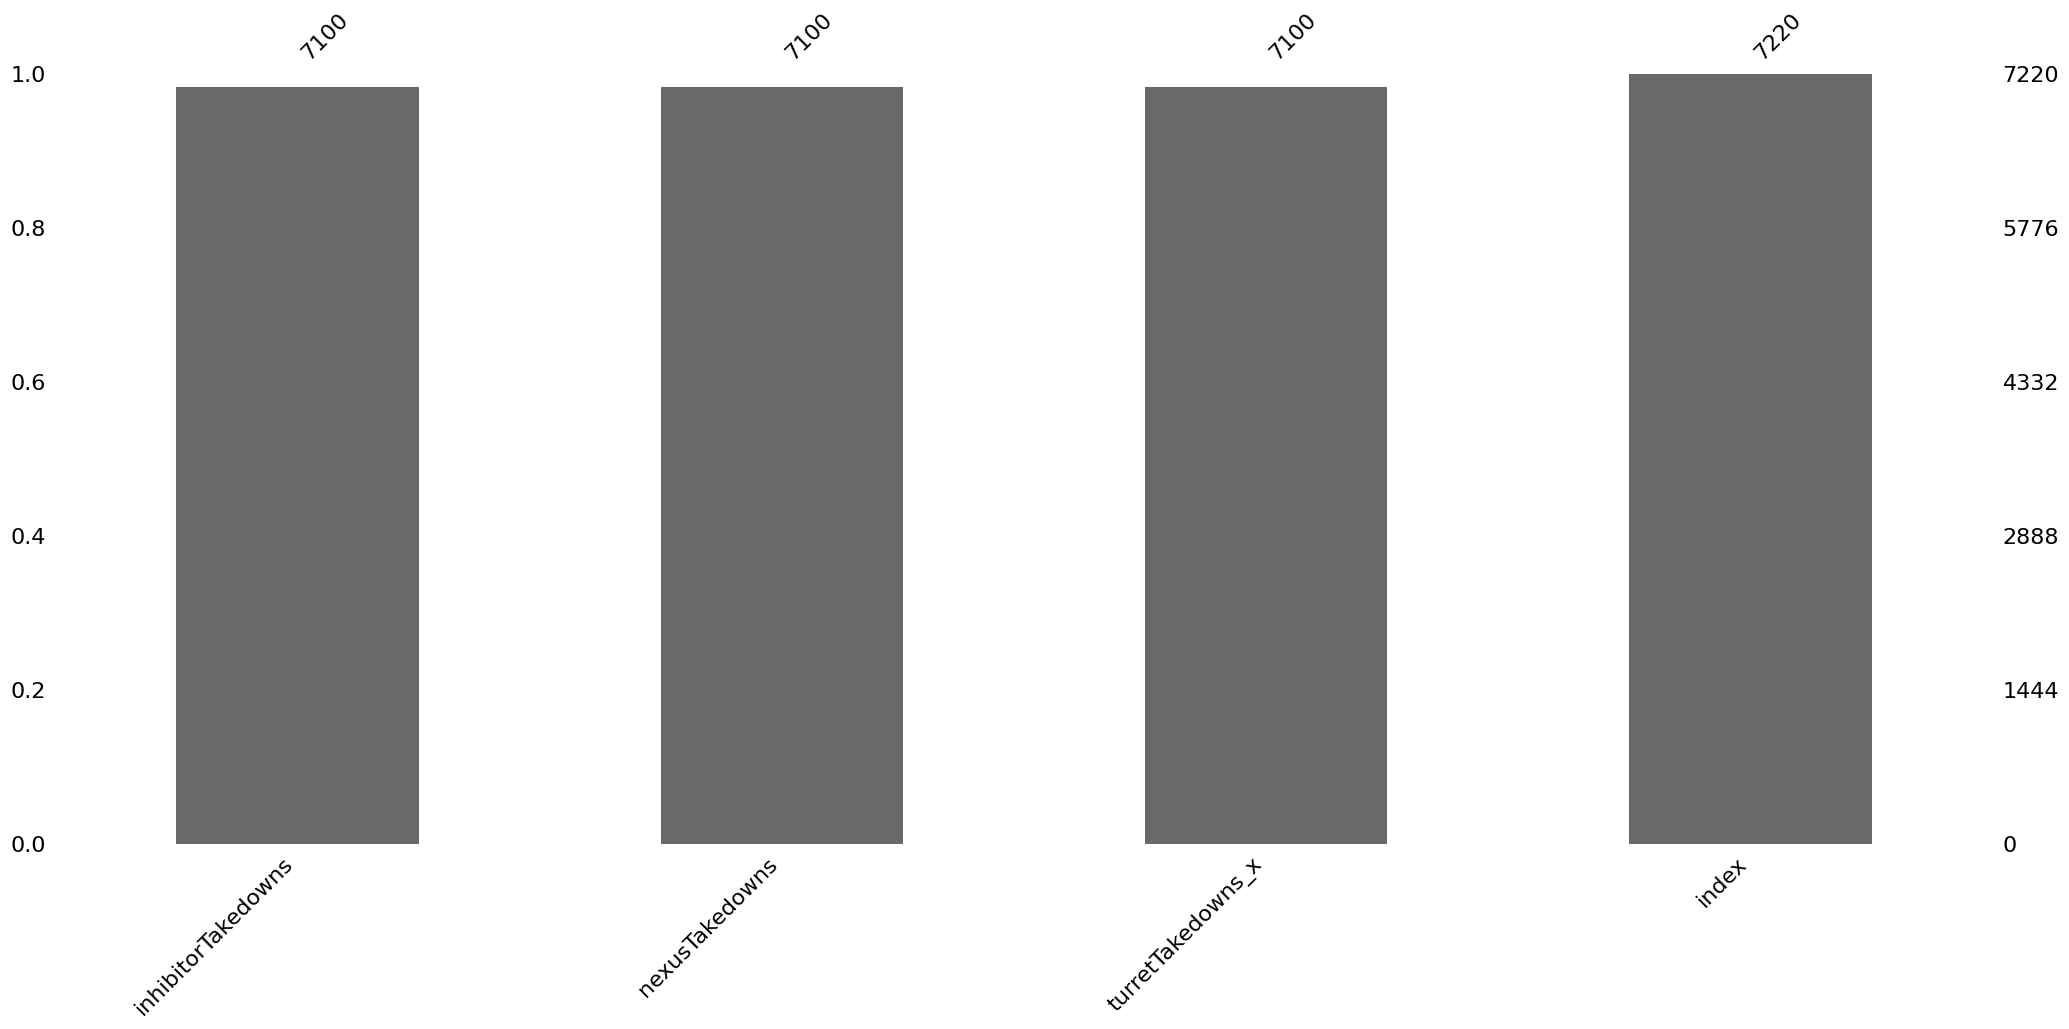

In [9]:
# Seleccionamos las columnas que poseen valores nulos y una que no para ver el total
Col_con_nulos = ['inhibitorTakedowns','nexusTakedowns', 'turretTakedowns_x','index']

# Graficamos estos datos
msno.bar(df_games[Col_con_nulos],
        #  figsize=(7,5)
         )

Podemos trabajar estos datos nulos de otra forma gracias a la poca cantidad que son respecto al resto. La idea que se propone para el trabajo de estos tiene que ver con reemplazar estos valores _NaN_ con _el promedio de la columna_. De esta forma a la hora de analizar la columna, estos datos no tendran un gran impacto en el mismo.

In [10]:
# Calculamos el promedio de cada una de estas columnas
# Selecionamos las columnas a trabajar
columns = ['inhibitorTakedowns','nexusTakedowns', 'turretTakedowns_x']

# Realizamos el bucle para estas columnas
for col in columns:
    
    # Calculamos el promedio de la col
    prom_col = round(df_games[col].mean(), 0)
    
    # Reemplazamos los NaN con estos valores
    df_games[col].fillna(prom_col, inplace=True)
    
print("Perfect: Se finalizaso el proceso de reemplazo de nulos!")

Perfect: Se finalizaso el proceso de reemplazo de nulos!


# 6. Feature selection 

## Encoding de variables & limpieza

In [11]:
# # Seleccionamos las variables resaltadas en nuestro recuadro
# variables = ['assists','bountyLevel','damageDealtToBuildings','damageDealtToObjectives','damageDealtToTurrets','damageSelfMitigated','detectorWardsPlaced','inhibitorKills','inhibitorsLost',
#              'largestKillingSpree','nexusKills','nexusLost','totalTimeSpentDead','turretKills','turretsLost','inhibitorTakedowns','nexusTakedowns','turretTakedowns_x','teamPosition', 'win']


# # Nos quedamos con las variables más importantes y las definimos en un df train 
# # df_for_testing = df_games[variables]
# games_from_GCDariusBrando = historial_del_jugador('GC LDCGOD')
# df_for_testing = games_from_GCDariusBrando[variables]

# # Seleccionamos las filas en donde hay valores nulos
# cols_vacias = df_for_testing[df_for_testing['teamPosition'].isna()].index

# # Eliminamos las columnas que indicamos anteriormente
# df_for_testing.drop(cols_vacias, axis=0, inplace=True)

# # Realizaremos un encoding de las variables de "teamPosition"
# le = preprocessing.LabelEncoder()
# le.fit(df_for_testing['teamPosition'])
# list(le.classes_)

# # transformamos las variables
# df_for_testing['teamPosition'] = le.transform(df_for_testing['teamPosition'])
# # list(le.inverse_transform(df_for_testing['teamPosition']))

# # Realizamos encoding de las variables win
# le = preprocessing.LabelEncoder()
# le.fit(df_for_testing['win'])
# list(le.classes_)

# # transformamos las variables
# df_for_testing['win'] = le.transform(df_for_testing['win'])
# # list(le.inverse_transform(df_for_testing['win']))

# # Reseteamos los indices
# df_for_testing.reset_index(inplace=True,
#                            drop=True)

# wn.filterwarnings('ignore')


Para este segundo criterio de selección de los datos, emplearemos el razonamiento que pudimos intuir del EDA realizado en pasos anteriores.

In [14]:
# Seleccionamos las las variables mas importantes en este segundo modelo
variables2 = ['assists', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'deaths', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'kills', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore', 'win']

# Nos quedamos con las variables más importantes y las definimos en un df train 
# df_for_testing = df_games[variables]
games_from_GCDariusBrando = historial_del_jugador('GC LDCGOD')
df_for_testing = games_from_GCDariusBrando[variables2]

# Hay que hacer el encoding de 4 variables
# Definimos el modelo
le = preprocessing.LabelEncoder()

# Realizamos el encoding
columnas = ['firstBloodKill', 'firstTowerKill', 'teamPosition', 'win']
for columna in columnas:
    
    # Empleamos el modelo
    le.fit(df_for_testing[columna]) 
    list(le.classes_)

    # transformamos las variables
    df_for_testing[columna] = le.transform(df_for_testing[columna])
    # list(le.inverse_transform(df_for_testing['teamPosition']))    
    
    wn.filterwarnings('ignore')
    
    # wn.filterwarnings('ignore')

# 7. Machine learning 

## Preparacion de datos 7.1

In [29]:
# Definimos las columnas que seran el x e y
y_cols = ['win']
x_cols1 = ['assists','bountyLevel','damageDealtToBuildings','damageDealtToObjectives','damageDealtToTurrets','damageSelfMitigated','detectorWardsPlaced','inhibitorKills','inhibitorsLost',
             'largestKillingSpree','nexusKills','nexusLost','totalTimeSpentDead','turretKills','turretsLost','inhibitorTakedowns','nexusTakedowns','turretTakedowns_x','teamPosition']

# Definimos el segundo modelo para x
x_cols2 = ['assists', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'deaths', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'kills', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore']


# Definimos las variables x y las y 
Y = df_for_testing[y_cols]
X = df_for_testing[x_cols2]

# Definimos los datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, ## Definimos el tamaño de los datos que vamos a emplear
                                                    random_state = 50)


## Preparación del modelo 7.2

### Arbol de desiciones 7.2.1

In [16]:
# Importamos las librerias necesarias para dicho analisis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [37]:
# Creamos una isntancia de arbol de desiciones
clf = DecisionTreeClassifier(max_depth=3,
                             random_state=20)
clf.fit(x_train, y_train)

# Realizamos un testeo de como resultan los datos
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Evaluamos la presicion del modelo sobre los valores de entrenamiento
accuracy = accuracy_score(y_train, y_train_pred)
print(f'La presición del modelo sobre los datos de entrenamiento es: {accuracy}')

# Evaluacmos la presicion del modelo sobre los valores de testeo
accuracy = accuracy_score(y_test, y_pred)
print(f'La presición del modelo sobre los datos de testeo es: {accuracy}')

La presición del modelo sobre los datos de entrenamiento es: 0.8336633663366336
La presición del modelo sobre los datos de testeo es: 0.7419354838709677


[Text(0.5, 0.875, 'x[3] <= 3238.5\ngini = 0.499\nsamples = 505\nvalue = [243, 262]'),
 Text(0.25, 0.625, 'x[5] <= 5.5\ngini = 0.437\nsamples = 288\nvalue = [195, 93]'),
 Text(0.125, 0.375, 'x[4] <= 11010.0\ngini = 0.48\nsamples = 120\nvalue = [48, 72]'),
 Text(0.0625, 0.125, 'gini = 0.471\nsamples = 71\nvalue = [44, 27]'),
 Text(0.1875, 0.125, 'gini = 0.15\nsamples = 49\nvalue = [4, 45]'),
 Text(0.375, 0.375, 'x[0] <= 10.5\ngini = 0.219\nsamples = 168\nvalue = [147, 21]'),
 Text(0.3125, 0.125, 'gini = 0.105\nsamples = 144\nvalue = [136, 8]'),
 Text(0.4375, 0.125, 'gini = 0.497\nsamples = 24\nvalue = [11, 13]'),
 Text(0.75, 0.625, 'x[5] <= 6.5\ngini = 0.345\nsamples = 217\nvalue = [48, 169]'),
 Text(0.625, 0.375, 'x[4] <= 7087.0\ngini = 0.153\nsamples = 132\nvalue = [11, 121]'),
 Text(0.5625, 0.125, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.6875, 0.125, 'gini = 0.097\nsamples = 118\nvalue = [6, 112]'),
 Text(0.875, 0.375, 'x[4] <= 9365.0\ngini = 0.492\nsamples = 85\nvalue =

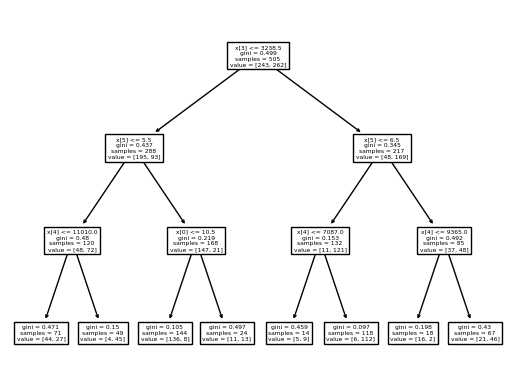

In [35]:
tree.plot_tree(clf)

### Posible solucion de overfitting

Una posible solucion para el overfittig pude ser de lo mas basico:
- Aumentar la cantidad de muestras
- Eliminar columnas

Para esto, lo que deberemos de hacer a su vez es un criterio mas selectivo de las variables que estamos empleando para el analisis. Deberemos de ver:
- Que no tengamos sesgos
- Las variables que estamos tomando
- Que no sea un level por ejemplo que es algo que antes de la partida uno no sabe
- Si los campeones estan balanceados

### Regresion logistica 7.2.2

In [34]:
# Librerias para este modelo
from sklearn.linear_model import LinearRegression, LogisticRegression

In [166]:
# Definimos la funcion
clf = LogisticRegression(solver='sag',
                         penalty='l2',
                         multi_class='ovr')
clf.fit(x_train, y_train)

# Definimos el valor de prediccion
y_train_pred = clf.predict(x_train)
y_pred = clf.predict(x_test)

# Evaluamos la presicion del modelo sobre los valores de entrenamiento
accuracy = accuracy_score(y_train, y_train_pred)
print(f'La presición del modelo sobre los datos de entrenamiento es: {accuracy}')

# Evaluacmos la presicion del modelo sobre los valores de testeo
accuracy = accuracy_score(y_test, y_pred)
print(f'La presición del modelo sobre los datos de testeo es: {accuracy}')

wn.filterwarnings('ignore')

### Primer modelo (primera eleccion de variables) iaccurancy = 93,77%
### Segundo modelo (segunda eleccion de variables) accurancy = 0.871 | 0.829
### Tercer modelo (cambio del modelo de "solver" del algoritmo) accurancy = 0.770 | 0.778

La presición del modelo sobre los datos de entrenamiento es: 0.7702970297029703
La presición del modelo sobre los datos de testeo es: 0.7788018433179723


# 8. Observaciones

En el primer modelo que realizamos se nos presento un problema de overfitting para el modelo, entonces los valores que nos devolvia la verdad que no eran de mucha ayuda. ¿Como encaramos esta problematica? Al principio los datos se conseguian de un mapa de correlacion, en este segundo intento se obtuvieron en base al EDA que se realizo en trabajos anteriores. Gracias a esto pudimos realizar un analisis muchisimo más rico.
Como se puede ver en el caso de la regresión logistica, obtenemos que el modelo predice bastante bien los datos de la partida. Con esto sabemos que el modelo es capaz que predecir si el jugador gano o perdio dicha partida sin necesidad de ver el resultado final. A pesar de ello, el modelo sirve y aprendio a predecir partidas en base a sus resultados, por lo que nos servira para poder predecir si una partida se gano o perdio sin la necesidad de observar el resultado final de las mismas, pero no nos sirve para predecir si una partida se ganara o perdera antes de que esta misma comience. Para dicha tarea hara falta trabajar más el conjunto de datos y observar cuales datos podemos sacar de un jugador que sean previos a la partida o que esten disponibles desde el segundo 0 de la misma (como el caso de una pagina op.gg que desde el segundo 0 nos da informacion completa de ambos equipos).

# 9. Futuras lineas

_Pasos o procesos que faltan realzar en el proyecto y se iran trabajando durante las fechas proximas_

- Investigacion de variables claves
- Desarrollo del dataframe con las nuevas variables (estas se conseguiran del mismo que tenemos actualmente)